# This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. This is a classification problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [19]:
data=pd.read_csv('Loan data prediction.csv')

In [23]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
df1=pd.DataFrame(data)

In [25]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
df1.shape

(614, 13)

There are in total 614 records and 13 features in the dataset.

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The features named as ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History are having numerical datatye and rest of the features are having object datatype.           

There are null values present in the dataset.

In [28]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 13,15,32,22,14,50 null values in feature named as Gender, Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History.

<AxesSubplot:>

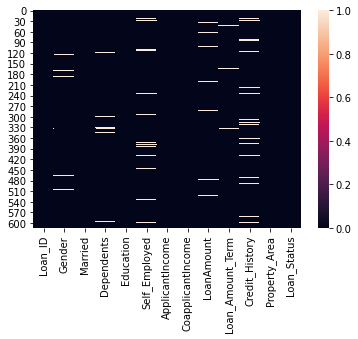

In [29]:
sns.heatmap(df1.isnull())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

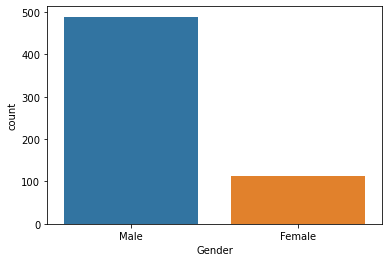

In [30]:
sns.countplot(df1['Gender'])

In [31]:
df1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

There are 489 records for Male and 112 records for Female. I will be replacing the null values in feature Gender with the mode of the column which is Male.

In [34]:
df1['Gender'].mode()

0    Male
dtype: object

In [35]:
df1['Gender']=df1["Gender"].fillna(df1["Gender"].mode()[0])

In [37]:
df1['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

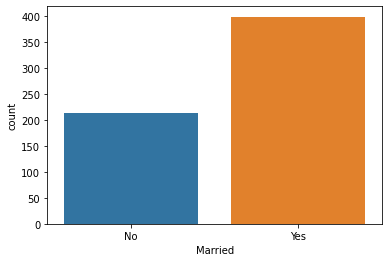

In [38]:
sns.countplot(df1['Married'])

In [39]:
df1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

There are 398 records for Yes married and 213 records for not married.

In [40]:
df1['Married'].mode()

0    Yes
dtype: object

In [41]:
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])

In [43]:
df1['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Have replaced the nan values in married feature with the mode of the feature. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

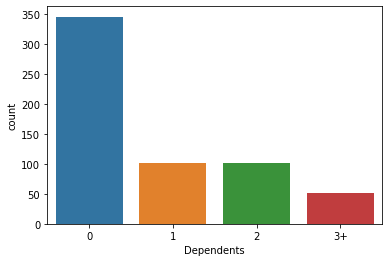

In [44]:
sns.countplot(df1['Dependents'])

In [45]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

There are maximum records i.e 345 for 0 dependents and lowest are for 3+ dependents.

In [46]:
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])

In [47]:
df1['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Have replaced the nan values in Dependents feature with the mode of the feature. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

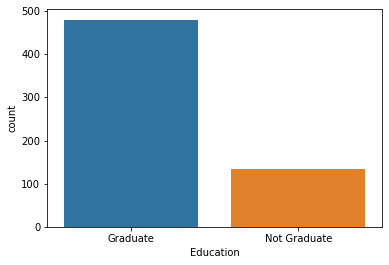

In [49]:
sns.countplot(df1['Education'])

In [50]:
df1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

There are 480 records with the graduation and 134 records with not Graduate.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

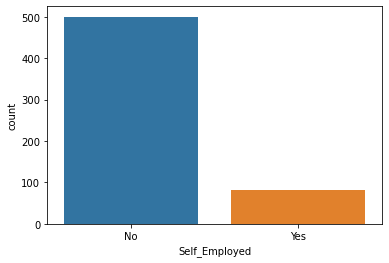

In [51]:
sns.countplot(df1['Self_Employed'])

In [52]:
df1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

There are 500 records for No self employed and 82 records for yes self employed.

In [53]:
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [54]:
df1['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Have replaced the nan values in self_employed feature with the mode of the feature. 

In [56]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The features named as ApplicantIncome and CoapplicantIncome, Loan amount are having right tailed skewness as the mean is greater than median.

There is a hugh difference between 75% and max values for features named as ApplicantIncome, CoapplicantIncome and LoanAmount. There are chances of outliers being present.

In [58]:
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())

In [59]:
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())

In [60]:
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())

The nan values in the above mentioned three features are replaced with the mean of the respective features.

<AxesSubplot:>

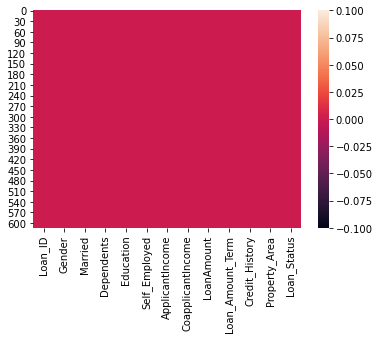

In [62]:
sns.heatmap(df1.isnull())

In [63]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are treated.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

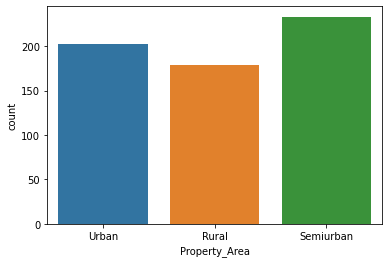

In [64]:
sns.countplot(df1['Property_Area'])

In [67]:
df1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

There are 233 records for Semiurban properties, 202 for urban properties and 179 for rural properties.

In [68]:
df1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are 422 records with Y i.e yes loans are approved and 192 records with N i.e No loans are approved.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

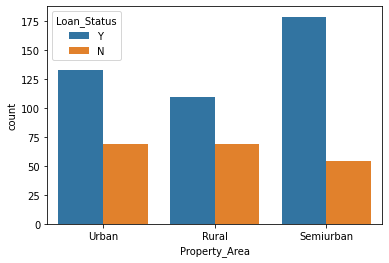

In [70]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df1)

In [72]:
df1[df1['Property_Area']=='Semiurban']['Loan_Status'].value_counts()

Y    179
N     54
Name: Loan_Status, dtype: int64

Most of the Loans application are from semiurban property_area. The loan approval percentage is 77% and the loan rejection is 23% in Semiurban property area. 

In [73]:
df1[df1['Property_Area']=='Rural']['Loan_Status'].value_counts()

Y    110
N     69
Name: Loan_Status, dtype: int64

The loan approval percentage is 61% and the loan rejection is 39% in Rural property area.



In [75]:
df1[df1['Property_Area']=='Urban']['Loan_Status'].value_counts()

Y    133
N     69
Name: Loan_Status, dtype: int64

The loan approval percentage is 66% and the loan rejection is 34% in Urban property area.



<AxesSubplot:xlabel='Credit_History', ylabel='count'>

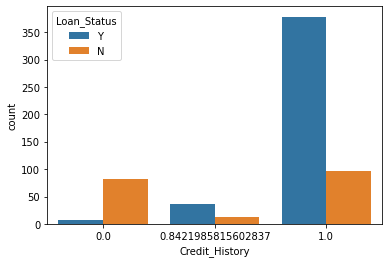

In [77]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df1)

In [79]:
df1['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

The person with a highest creditscore has more chance to get loan approval as compared to the one who is not having credit score i.e zero.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

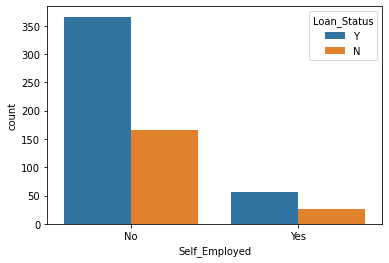

In [82]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df1)

There are very less self_employed candidate for the application of the loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

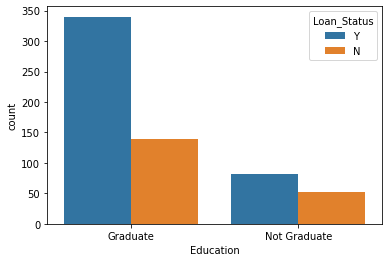

In [83]:
sns.countplot(x='Education',hue='Loan_Status',data=df1)

In [87]:
df1[df1['Education']=='Graduate']['Loan_Status'].value_counts()

Y    340
N    140
Name: Loan_Status, dtype: int64

The candidate who is graduate and applying for loan has more chances of approval i.e 77% as compared to Not Graudate where chances of approval are 53% 

In [89]:
df1[df1['Education']=='Not Graduate']['Loan_Status'].value_counts()

Y    82
N    52
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

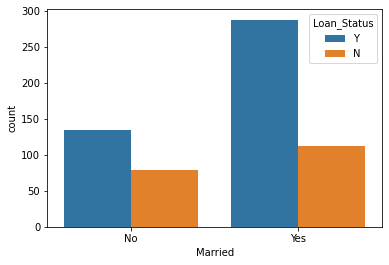

In [90]:
sns.countplot(x='Married',hue='Loan_Status',data=df1)

There are more loan application from those who are married as compared to not married.

In [91]:
df1[df1['Married']=='Yes']['Loan_Status'].value_counts()

Y    288
N    113
Name: Loan_Status, dtype: int64

In [92]:
df1[df1['Married']=='No']['Loan_Status'].value_counts()

Y    134
N     79
Name: Loan_Status, dtype: int64

There are 77% chances for loan approval for those who are married as compared to those who are not married where chances are 63%.

<AxesSubplot:xlabel='Gender', ylabel='count'>

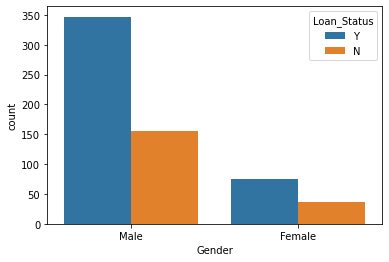

In [94]:
sns.countplot(x='Gender',hue='Loan_Status',data=df1)

The most of the loan applicable comes from Male as comapred to Female.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

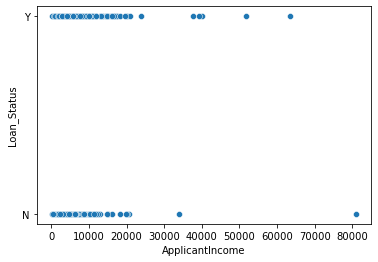

In [95]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df1)

As such no such relationship can be established from the above plot. Further, one thing can be said that if a applicant income is above 40000 there are more chances of loan getting approved.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

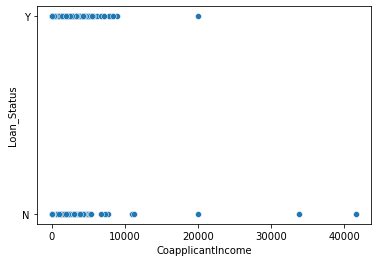

In [96]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df1)

As such no such relationship can be established from the above plot. Further, one thing can be said that if a coapplicant income is above 20000 there are chances of loan getting rejected. 

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

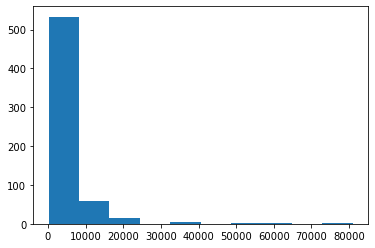

In [97]:
plt.hist(df1['ApplicantIncome'])

The most of records i.e ApplicantIncome is in the range from 0 to 8000.

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

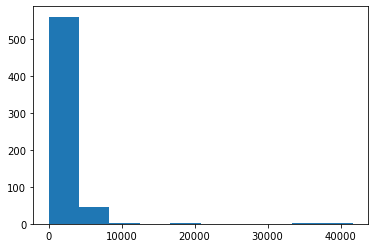

In [98]:
plt.hist(df1['CoapplicantIncome'])

The most of records i.e CoapplicantIncome is in the range from 0 to 6000.

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

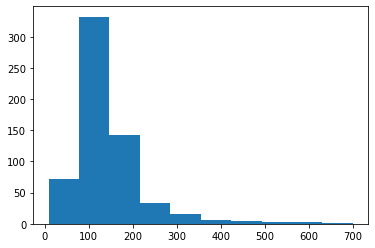

In [99]:
plt.hist(df1['LoanAmount'])

The most of records i.e Loanamount is in the range from 80 to 180.

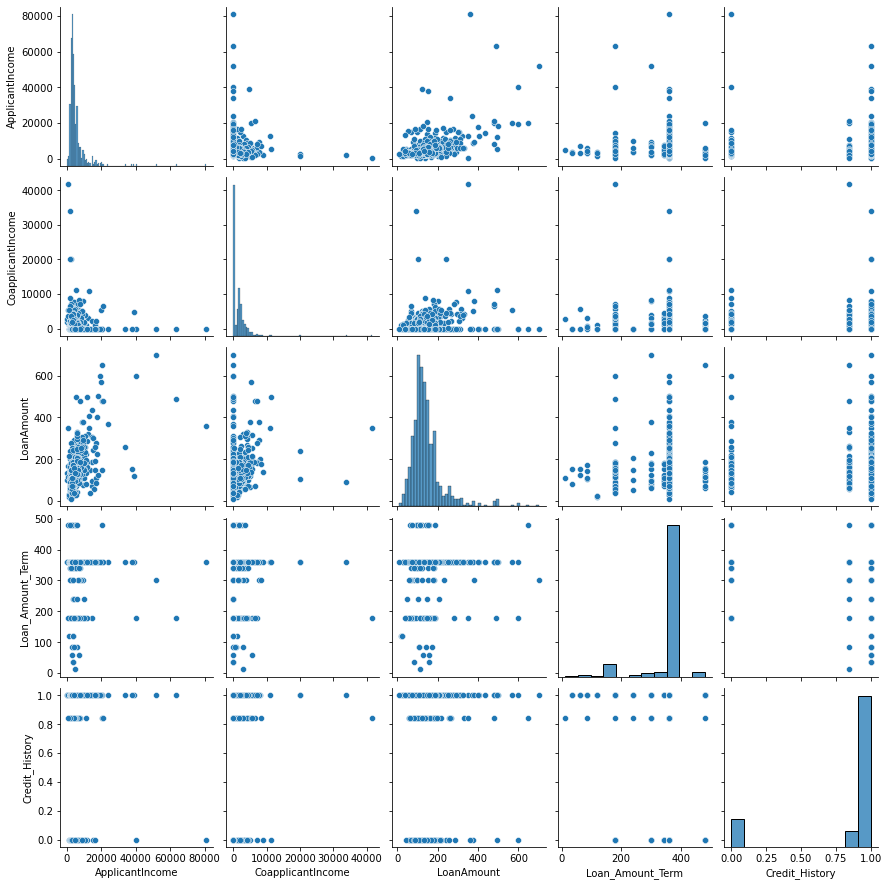

In [101]:
sns.pairplot(df1)

There is a linear correlation between LoanAmount and the Applicant income.

<AxesSubplot:>

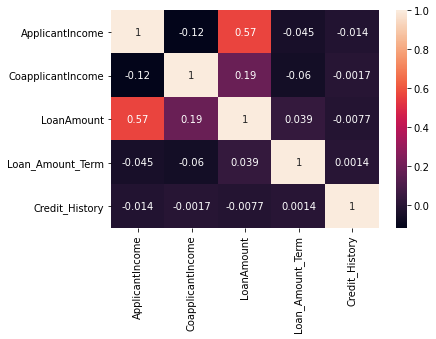

In [103]:
sns.heatmap(df1.corr(),annot=True)

There is a very less negative correlation between ApplicationIncome and Loan_Amount_Term and same for credit_history.

ApplicantIncome         AxesSubplot(0.125,0.657941;0.227941x0.222059)
CoapplicantIncome    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
LoanAmount           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Credit_History       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

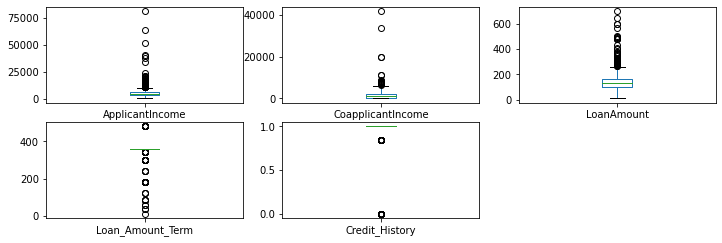

In [105]:
df1.plot(kind='box',figsize=[12,6],layout=[3,3],subplots=True)

There are outliers in ApplicantIncome,CoapplicantIncome, Loan amount , Loan_Amount_Term, Credit_history. Further, outliers are there  but i am not treating it as the chances are that a application as well as Coapplicant salary can be more than whiskers.

The same is for Loan amount i.e loam amount sanctioned  can be more depending on Applicant as well a Coapplicantincome.

I am not treating outliers.

# Skewness

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

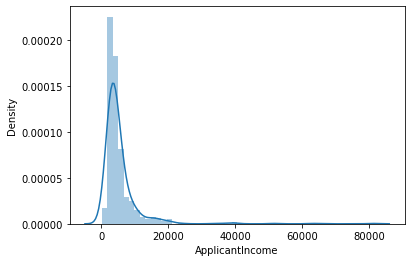

In [107]:
sns.distplot(df1['ApplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

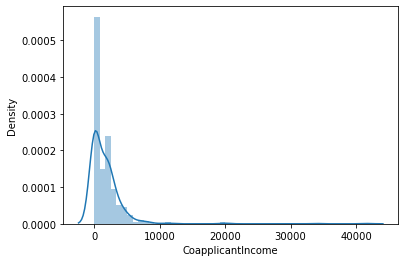

In [108]:
sns.distplot(df1['CoapplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

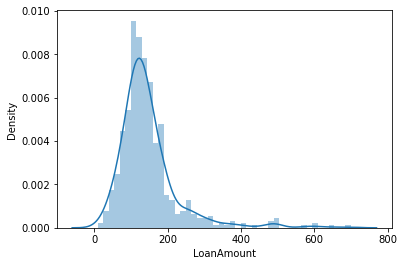

In [109]:
sns.distplot(df1['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

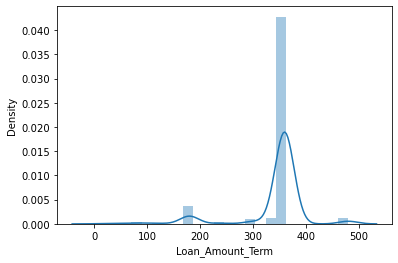

In [111]:
sns.distplot(df1['Loan_Amount_Term'])

In [112]:
df1.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [157]:
df3=df1.copy()

In [158]:
df3.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [159]:
df3['ApplicantIncome']=np.log(df3['ApplicantIncome'])

In [160]:
df3.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [161]:
from sklearn.preprocessing import power_transform
df3['CoapplicantIncome']=power_transform(df3['CoapplicantIncome'].values.reshape(-1,1))

In [162]:
df3['LoanAmount']=power_transform(df3['LoanAmount'].values.reshape(-1,1))

In [163]:
df3['Loan_Amount_Term']=power_transform(df3['Loan_Amount_Term'].values.reshape(-1,1))

In [164]:
df3['Credit_History']=power_transform(df3['Credit_History'].values.reshape(-1,1))

In [166]:
df3['Credit_History']=power_transform(df3['Credit_History'].values.reshape(-1,1))

In [167]:
df3.skew()

ApplicantIncome      0.479580
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.314523
dtype: float64

Skewness has been treated, Further, the skewness>0.5 is there in Credit_History but i am not treating it.

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
le=LabelEncoder()
df3['Gender']=le.fit_transform(df3['Gender'])
df3['Married']=le.fit_transform(df3['Married'])
df3['Dependents']=le.fit_transform(df3['Dependents'])
df3['Education']=le.fit_transform(df3['Education'])

In [170]:
df3['Self_Employed']=le.fit_transform(df3['Self_Employed'])
df3['Property_Area']=le.fit_transform(df3['Property_Area'])
df3['Loan_Status']=le.fit_transform(df3['Loan_Status'])

In [171]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,-1.102837,0.235387,0.185905,0.540673,2,1
1,LP001003,1,1,1,0,0,8.430109,0.750578,-0.037659,0.185905,0.540673,0,0
2,LP001005,1,1,0,0,1,8.006368,-1.102837,-1.346305,0.185905,0.540673,2,1
3,LP001006,1,1,0,1,0,7.856707,0.891686,-0.167886,0.185905,0.540673,2,1
4,LP001008,1,0,0,0,0,8.699515,-1.102837,0.158610,0.185905,0.540673,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,7.972466,-1.102837,-1.205100,0.185905,0.540673,0,1
610,LP002979,1,1,3,0,0,8.320205,-1.102837,-2.293317,-2.308570,0.540673,0,1
611,LP002983,1,1,1,0,0,8.996157,0.208603,1.372409,0.185905,0.540673,2,1
612,LP002984,1,1,2,0,0,8.933664,-1.102837,0.738924,0.185905,0.540673,2,1


In [173]:
df3.drop('Loan_ID',axis=1,inplace=True)

In [174]:
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,-1.102837,0.235387,0.185905,0.540673,2,1
1,1,1,1,0,0,8.430109,0.750578,-0.037659,0.185905,0.540673,0,0
2,1,1,0,0,1,8.006368,-1.102837,-1.346305,0.185905,0.540673,2,1
3,1,1,0,1,0,7.856707,0.891686,-0.167886,0.185905,0.540673,2,1
4,1,0,0,0,0,8.699515,-1.102837,0.158610,0.185905,0.540673,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,-1.102837,-1.205100,0.185905,0.540673,0,1
610,1,1,3,0,0,8.320205,-1.102837,-2.293317,-2.308570,0.540673,0,1
611,1,1,1,0,0,8.996157,0.208603,1.372409,0.185905,0.540673,2,1
612,1,1,2,0,0,8.933664,-1.102837,0.738924,0.185905,0.540673,2,1


In [175]:
x=df3.drop('Loan_Status',axis=1)
y=df3['Loan_Status']

In [176]:
se=StandardScaler()
x=se.fit_transform(x)

# Splitting the data into train_test_split

In [177]:
from sklearn.model_selection import train_test_split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [197]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.7723577235772358
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123

[[22 21]
 [ 7 73]]


In [198]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(accuracy_score(y_test,pred1))
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))


0.7073170731707317
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        43
           1       0.76      0.81      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.70      0.71      0.70       123

[[22 21]
 [15 65]]


In [199]:
svc=SVC()
svc.fit(x_train,y_train)
pred2=svc.predict(x_test)
print(accuracy_score(y_test,pred2))
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

0.7560975609756098
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        43
           1       0.77      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.75      0.76      0.74       123

[[22 21]
 [ 9 71]]


In [201]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
print(accuracy_score(y_test,pred3))
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))


0.7317073170731707
              precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123

[[17 26]
 [ 7 73]]


In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred4=rfc.predict(x_test)
print(accuracy_score(y_test,pred4))
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))

0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

[[18 25]
 [ 2 78]]


In [205]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(accuracy_score(y_test,pred5))
print(classification_report(y_test,pred5))
print(confusion_matrix(y_test,pred5))


0.7317073170731707
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.74      0.90      0.81        80

    accuracy                           0.73       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123

[[18 25]
 [ 8 72]]


In [206]:
gr=GradientBoostingClassifier()
gr.fit(x_train,y_train)
pred6=ada.predict(x_test)
print(accuracy_score(y_test,pred6))
print(classification_report(y_test,pred6))
print(confusion_matrix(y_test,pred6))

0.7317073170731707
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.74      0.90      0.81        80

    accuracy                           0.73       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123

[[18 25]
 [ 8 72]]


# Calculating cross_val_score

In [207]:
from sklearn.model_selection import cross_val_score

In [208]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.7703985072637611


In [209]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1.mean())

0.7117686258829802


In [210]:
score2=cross_val_score(svc,x,y,cv=5)
print(score2.mean())

0.7655071304811409


In [211]:
score3=cross_val_score(knn,x,y,cv=5)
print(score3.mean())

0.7312541650006664


In [213]:
score4=cross_val_score(rfc,x,y,cv=5)
print(score4.mean())

0.7834332933493269


In [214]:
score5=cross_val_score(ada,x,y,cv=5)
print(score5.mean())

0.7784752765560443


In [217]:
score6=cross_val_score(gr,x,y,cv=5)
print(score6.mean())

0.7752365720378516


# Logictic Regression, Decision Tree Classifier, KNeighborsClassifier and RandomForestClassifier is my best model. Have to go for hypertuning of the parameters to get the best model.

In [218]:
from sklearn.model_selection import RandomizedSearchCV

In [219]:
LogisticRegression?

In [220]:
params={'C':[0.1,0.2,0.3,0.4,0.5],'random_state':np.arange(1,100)}

In [222]:
re=RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 25, 'C': 0.1}

In [223]:
lr=LogisticRegression(C=0.1,random_state=25)
lr.fit(x_train,y_train)
pred7=lr.predict(x_test)
print(accuracy_score(y_test,pred7))
print(classification_report(y_test,pred7))
print(confusion_matrix(y_test,pred7))


0.7804878048780488
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        43
           1       0.78      0.93      0.85        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.73       123
weighted avg       0.78      0.78      0.77       123

[[22 21]
 [ 6 74]]


In [229]:
params1={'criterion':['gini','entropy'],'max_depth':[2,4,6,8,10],'max_features':['auto','sqrt','log2']}

In [230]:
re=RandomizedSearchCV(dtc,param_distributions=params1,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy'}

In [231]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features='sqrt')
dtc.fit(x_train,y_train)
pred8=dtc.predict(x_test)
print(accuracy_score(y_test,pred8))
print(classification_report(y_test,pred8))
print(confusion_matrix(y_test,pred8))


0.7154471544715447
              precision    recall  f1-score   support

           0       0.79      0.26      0.39        43
           1       0.71      0.96      0.81        80

    accuracy                           0.72       123
   macro avg       0.75      0.61      0.60       123
weighted avg       0.73      0.72      0.66       123

[[11 32]
 [ 3 77]]


In [234]:
params2={'n_neighbors':np.arange(1,10),'algorithm':['auto','ball_tree', 'kd_tree', 'brute']}

In [235]:
re=RandomizedSearchCV(knn,param_distributions=params2,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'n_neighbors': 8, 'algorithm': 'auto'}

In [236]:
knn=KNeighborsClassifier(n_neighbors=8,algorithm='auto')
knn.fit(x_train,y_train)
pred9=dtc.predict(x_test)
print(accuracy_score(y_test,pred9))
print(classification_report(y_test,pred9))
print(confusion_matrix(y_test,pred9))



0.7154471544715447
              precision    recall  f1-score   support

           0       0.79      0.26      0.39        43
           1       0.71      0.96      0.81        80

    accuracy                           0.72       123
   macro avg       0.75      0.61      0.60       123
weighted avg       0.73      0.72      0.66       123

[[11 32]
 [ 3 77]]


In [240]:
param4={'n_estimators':[50,100,150,200],'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2']}

In [242]:
re=RandomizedSearchCV(rfc,param_distributions=param4,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'n_estimators': 150,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'entropy'}

In [243]:
rfc=RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=2,max_features='sqrt')
rfc.fit(x_train,y_train)
pred10=rfc.predict(x_test)
print(accuracy_score(y_test,pred10))
print(classification_report(y_test,pred10))
print(confusion_matrix(y_test,pred10))


0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


# Random Forest Classifier is my best model with accuracy score of 79%

In [244]:
from sklearn.metrics import plot_roc_curve

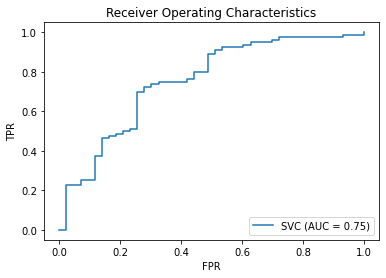

In [245]:
plot_roc_curve(svc,x_test,y_test)
plt.title('Receiver Operating Characteristics')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [246]:
import joblib

In [247]:
joblib.dump(rfc,'loan_predict.obj')

['loan_predict.obj']

In [248]:
joblib.load('loan_predict.obj')

RandomForestClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       n_estimators=150)